In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [16]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_test.shape

(10000, 32, 32, 3)

In [18]:
y_train = y_train.reshape(-1,)

In [19]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog","frog", "horse", "ship", "truck"]

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

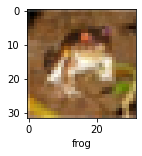

In [21]:
plot_sample(X_train, y_train, 0)

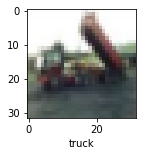

In [22]:
plot_sample(X_train, y_train, 2)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann.fit(X_train, y_train, epochs=5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classfication report: \n", classification_report(y_test, y_pred_classes))

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/codebaker/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 15)

In [29]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6822 - loss: 1.0557


[1.0431221723556519, 0.6833000183105469]

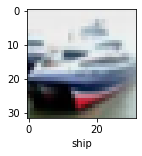

In [33]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [34]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [35]:
y_pred[:5]         #it gives the normalised values due to the softmax activation function. They sum to 1

array([[1.42002199e-03, 3.30960065e-05, 8.95424106e-04, 6.87714279e-01,
        1.73406606e-05, 2.81889558e-01, 1.42622506e-04, 1.33499387e-03,
        2.64961533e-02, 5.65084119e-05],
       [2.37038112e-04, 1.71462982e-03, 3.64394941e-06, 1.87065837e-06,
        3.44124951e-09, 1.66420022e-09, 1.30493651e-08, 2.29764670e-08,
        9.96100783e-01, 1.94184564e-03],
       [1.46374673e-01, 8.63853097e-02, 2.26148660e-03, 6.87379614e-02,
        1.49577744e-02, 3.10083502e-03, 7.56110530e-05, 4.44257744e-02,
        6.22884989e-01, 1.07955458e-02],
       [6.79060459e-01, 1.26785897e-02, 8.45883682e-04, 2.06008444e-05,
        6.52740593e-04, 6.65451921e-07, 1.15361399e-05, 2.60613575e-07,
        3.06482106e-01, 2.47148273e-04],
       [2.04156231e-06, 4.92882064e-05, 4.00615484e-01, 1.97918378e-02,
        1.23752035e-01, 6.63982937e-04, 4.54454184e-01, 1.28812957e-07,
        6.70857728e-04, 2.22929529e-07]], dtype=float32)

In [40]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1]

In [41]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

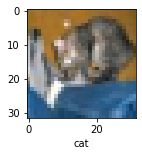

In [42]:
plot_sample(X_test, y_test, 0)

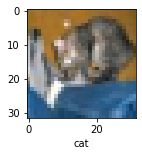

In [43]:
plot_sample(X_test, y_classes, 0)

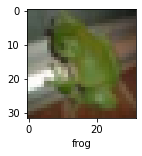

In [45]:
plot_sample(X_test, y_test, 7)

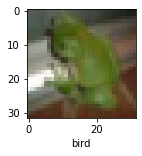

In [46]:
plot_sample(X_test, y_classes, 7)      # Wrong prediction done in this case.
